### STOCK VOLATILITY PREDICTION USING GARCH

In [106]:
import pandas as pd 
import numpy as np 
import requests
import sqlite3

##### Accessing APIs Through a URL

I'll extract stock market information from the [AlphaVantage](https://alphavantage.co/) API. To get a sense of how an API works, consider the URL below. Take a moment to read the text of the link itself, then click on it and examine the data that appears in your browser. What's the format of the data? What data is included? How is it organized? 

##### Demo API 

In [24]:
url = ("https://www.alphavantage.co/query?"
       "function=TIME_SERIES_DAILY&"
       "symbol=IBM&"
       "apikey=demo")

print("url type:", type(url))
url

url type: <class 'str'>


'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=IBM&apikey=demo'

Now that we have a sense of the components of URL that gets information from AlphaVantage, let's create our own for a different stock.

In [25]:
url = ("https://www.alphavantage.co/query?"
       "function=TIME_SERIES_DAILY&"
       "symbol=AMBUJACEM.BSE&"
       "apikey=demo")

print("url type:", type(url))
url

url type: <class 'str'>


'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=AMBUJACEM.BSE&apikey=demo'

Now that we've stored our API key, we need to import it into our code base. This is commonly done by creating a `config` module.

In [34]:
# Assuming this is your main script

from config import settings  # Assuming you've renamed config.py to your actual module name

# Access the settings
print(f"Alpha Vantage API Key: {settings.alpha_vantage_api_key}")
print(f"Database Name: {settings.db_name}")
print(f"Model Directory: {settings.model_directory}")

Alpha Vantage API Key: INCQJAFFKS1UL381
Database Name: stocks.sqlite
Model Directory: models


In [42]:
# dir(settings)

Now lets create a URL for "AMBUJACEM.BSE". This time, use the base URL `"https://learn-api.wqu.edu/1/data-services/alpha-vantage/query?"` and incorporate your API key.

In [36]:
url = ("https://www.alphavantage.co/query?"
       "function=TIME_SERIES_DAILY&"
       "symbol=AMBUJACEM.BSE&"
       f"apikey={settings.alpha_vantage_api_key}"
    )

print("url type:", type(url))
url

url type: <class 'str'>


'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=AMBUJACEM.BSE&apikey=INCQJAFFKS1UL381'

<a id="task-815">Go</a> to the documentation for the [AlphaVantage Time Series Daily API](https://www.alphavantage.co/documentation/#daily). Expand your URL to incorporate all the parameters listed in the documentation. Also, to make your URL more dynamic, create variable names for all the parameters that can be added to the URL.

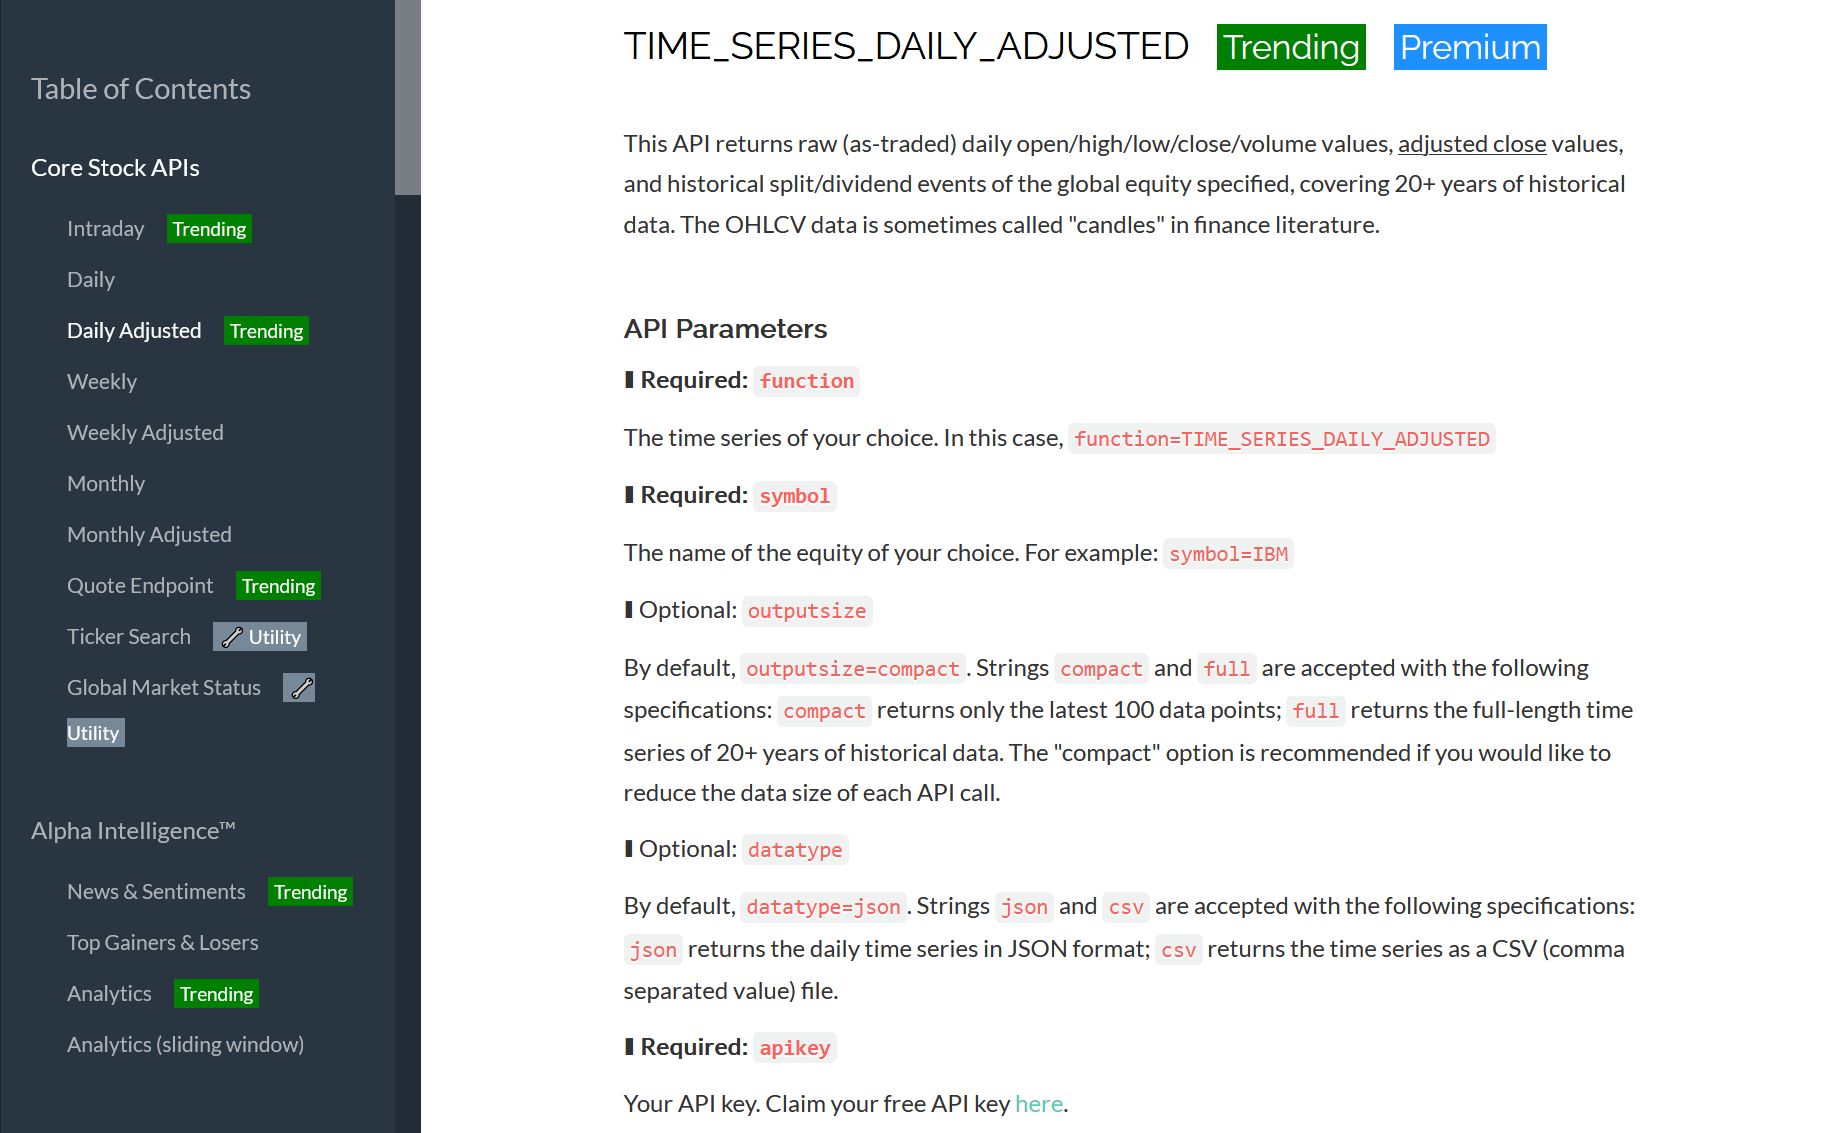

In [37]:
from IPython.display import Image, display
import os
ROOT = os.getcwd()

image_path = os.path.join(ROOT, "stock.PNG")

# Display the image
display(Image(filename=image_path))


Now let's get a better view of our Data to be extracted by considering other Parameters

In [38]:
ticker = "AMBUJACEM.BSE"
output_size = "compact"
data_type = "json"

url = ("https://www.alphavantage.co/query?"
       "function=TIME_SERIES_DAILY&"
       f"symbol={ticker}&"
       f"outputsize={output_size}&"
       f"datatype={data_type}&"
       f"apikey={settings.alpha_vantage_api_key}"
    )

print("url type:", type(url))
url

url type: <class 'str'>


'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=AMBUJACEM.BSE&outputsize=compact&datatype=json&apikey=INCQJAFFKS1UL381'

Let's implement the above as a Function that takes in those parameters and return a url link

In [39]:
def alphavantage_url(ticker : str, output_size : str, data_type : str):
    base_url = "https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&"
    url = (base_url + f"symbol={ticker}&" + 
                f"outputsize={output_size}&" + f"datatype={data_type}&" +
                     f"apikey={settings.alpha_vantage_api_key}")  
    return url 

In [40]:
url = alphavantage_url("AMBUJACEM.BSE", "compact", "json")
url

'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=AMBUJACEM.BSE&outputsize=compact&datatype=json&apikey=INCQJAFFKS1UL381'

#### Accessing APIs Through a Request

In [41]:
response = requests.get(url=url)

In [35]:
print("response type:", type(response))

response type: <class 'requests.models.Response'>


In [43]:
# dir(response)

In [37]:
response.status_code

200

In [44]:
# Getting Response Json

response_data = response.json()

print("response_data type:", type(response_data))

response_data type: <class 'dict'>


In [45]:
# Response Data Key
response_data.keys()

dict_keys(['Meta Data', 'Time Series (Daily)'])

In [46]:
response_data["Time Series (Daily)"]

{'2023-12-27': {'1. open': '520.0500',
  '2. high': '523.0000',
  '3. low': '513.2500',
  '4. close': '516.4000',
  '5. volume': '218846'},
 '2023-12-26': {'1. open': '503.8000',
  '2. high': '508.5000',
  '3. low': '502.9500',
  '4. close': '505.1500',
  '5. volume': '114257'},
 '2023-12-22': {'1. open': '505.6500',
  '2. high': '509.4500',
  '3. low': '498.2000',
  '4. close': '503.8000',
  '5. volume': '85760'},
 '2023-12-21': {'1. open': '477.3000',
  '2. high': '505.9500',
  '3. low': '477.3000',
  '4. close': '503.8000',
  '5. volume': '584091'},
 '2023-12-20': {'1. open': '523.2500',
  '2. high': '526.0000',
  '3. low': '486.4500',
  '4. close': '490.5500',
  '5. volume': '216525'},
 '2023-12-19': {'1. open': '529.8500',
  '2. high': '529.9000',
  '3. low': '516.7500',
  '4. close': '522.3000',
  '5. volume': '74154'},
 '2023-12-18': {'1. open': '529.6000',
  '2. high': '532.5500',
  '3. low': '524.3000',
  '4. close': '525.4500',
  '5. volume': '168807'},
 '2023-12-15': {'1. op

In [47]:
stock_data = response_data["Time Series (Daily)"]

Read the data from `stock_data` into a DataFrame

In [54]:
df_ambuja = pd.DataFrame.from_dict(stock_data, orient="index", dtype=float)

In [55]:
df_ambuja

,1. open,2. high,3. low,4. close,5. volume
2023-12-27,520.05,523.00,513.25,516.40,218846.0
2023-12-26,503.80,508.50,502.95,505.15,114257.0
2023-12-22,505.65,509.45,498.20,503.80,85760.0
2023-12-21,477.30,505.95,477.30,503.80,584091.0
2023-12-20,523.25,526.00,486.45,490.55,216525.0
...,...,...,...,...,...
2023-08-07,472.25,476.00,468.85,474.00,80191.0
2023-08-04,474.25,477.35,470.40,471.60,115736.0
2023-08-03,464.25,480.90,458.60,474.20,787931.0
2023-08-02,460.65,469.00,449.70,460.95,451281.0


In [56]:
print("df_ambuja shape:", df_ambuja.shape)
print()
print(df_ambuja.info())
df_ambuja.head(10)

df_ambuja shape: (100, 5)

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 2023-12-27 to 2023-08-01
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   1. open    100 non-null    float64
 1   2. high    100 non-null    float64
 2   3. low     100 non-null    float64
 3   4. close   100 non-null    float64
 4   5. volume  100 non-null    float64
dtypes: float64(5)
memory usage: 4.7+ KB
None


,1. open,2. high,3. low,4. close,5. volume
2023-12-27,520.05,523.00,513.25,516.40,218846.0
2023-12-26,503.80,508.50,502.95,505.15,114257.0
2023-12-22,505.65,509.45,498.20,503.80,85760.0
2023-12-21,477.30,505.95,477.30,503.80,584091.0
2023-12-20,523.25,526.00,486.45,490.55,216525.0
2023-12-19,529.85,529.90,516.75,522.30,74154.0
2023-12-18,529.60,532.55,524.30,525.45,168807.0
2023-12-15,523.10,529.60,514.65,522.35,316907.0
2023-12-14,514.00,523.35,511.75,520.35,163569.0
2023-12-13,503.20,513.35,502.40,509.00,116481.0


In [59]:
# Converting the Date from string, to Date time index
df_ambuja.index = pd.to_datetime(df_ambuja.index)

# Lets give our index name 
df_ambuja.index.name = "Date"

In [60]:
df_ambuja.head()

,1. open,2. high,3. low,4. close,5. volume
Date,,,,,
2023-12-27,520.05,523.00,513.25,516.40,218846.0
2023-12-26,503.80,508.50,502.95,505.15,114257.0
2023-12-22,505.65,509.45,498.20,503.80,85760.0
2023-12-21,477.30,505.95,477.30,503.80,584091.0
2023-12-20,523.25,526.00,486.45,490.55,216525.0


In [61]:
df_ambuja.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100 entries, 2023-12-27 to 2023-08-01
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   1. open    100 non-null    float64
 1   2. high    100 non-null    float64
 2   3. low     100 non-null    float64
 3   4. close   100 non-null    float64
 4   5. volume  100 non-null    float64
dtypes: float64(5)
memory usage: 4.7 KB


In [69]:
[col[1] for col in (col for col in df_ambuja.columns.str.split(" "))]

['open', 'high', 'low', 'close', 'volume']

In [73]:
[col[3:] for col in df_ambuja.columns]

['open', 'high', 'low', 'close', 'volume']

In [75]:
[col.split(" ")[1] for col in df_ambuja.columns]

['open', 'high', 'low', 'close', 'volume']

In [ ]:
# Name the columns like this excatly the same way by removing the number and . in front of the name
df_ambuja.columns = [col[1] for col in (col for col in df_ambuja.columns.str.split(" "))]

In [81]:
# Or Renaming the columns for better understanding
df_ambuja.rename(columns={"1. open": "Open Price", "2. high":"Highest Price", 
                    "3. low": "Lowest Price", "4. close": "Closing Price", 
                    "5. volume": "Volume"}, inplace=True)

In [82]:
df_ambuja.head()

,Open Price,Highest Price,Lowest Price,Closing Price,Volume
Date,,,,,
2023-12-27,520.05,523.00,513.25,516.40,218846.0
2023-12-26,503.80,508.50,502.95,505.15,114257.0
2023-12-22,505.65,509.45,498.20,503.80,85760.0
2023-12-21,477.30,505.95,477.30,503.80,584091.0
2023-12-20,523.25,526.00,486.45,490.55,216525.0


In [84]:
df_ambuja.shape

(100, 5)

<font size="+3"><strong> Test Driven Development</strong></font>

Now I have two goals. First, I'll take the code I used to access the API and build an `AlphaVantageAPI` class. This will allow me to reuse our code. Second, I'll create a `SQLRepository` class that will help me load our stock data into a SQLite database and then extract it for later use. Additionally, I'll build this code using a technique called **test driven development**, where I'll use `assert` statements to make sure everything is working properly. That way, I'll avoid issues later when I build the application.

In [248]:
# Instantiate the class from data.py 
from data import AlphaVantageAPI, SQLRepository

av = AlphaVantageAPI()

In [249]:
# Define Suzlon ticker symbol
ticker = "SUZLON.BSE"

# Use your `av` object to get daily data
df_suzlon = av.get_daily(ticker=ticker)

print("df_suzlon type:", type(df_suzlon))
print("df_suzlon shape:", df_suzlon.shape)
df_suzlon.head()

df_suzlon type: <class 'pandas.core.frame.DataFrame'>
df_suzlon shape: (4482, 5)


,open,high,low,close,volume
Date,,,,,
2023-12-29,38.50,38.68,38.00,38.18,5447578.0
2023-12-28,37.29,38.50,37.20,38.19,10287790.0
2023-12-27,36.95,37.25,36.25,37.05,2563544.0
2023-12-26,37.69,37.69,36.60,36.88,2496622.0
2023-12-22,37.25,37.70,36.50,37.21,4938851.0


In [210]:
df_suzlon.index = pd.to_datetime(df_suzlon.index)

In [211]:
# Does `get_daily` return a DataFrame?
assert isinstance(df_suzlon, pd.DataFrame)

# Does DataFrame have 5 columns?
assert df_suzlon.shape[1] == 5

# Does DataFrame have a DatetimeIndex?
assert type(df_suzlon.index) == pd.DatetimeIndex
# assert isinstance(df_suzlon.index , pd.DatetimeIndex)

# Is the index name "date"?
assert df_suzlon.index.name == "Date"

In [212]:
# Does DataFrame have correct column names?
assert df_suzlon.columns.to_list() == ['open', 'high', 'low', 'close', 'volume']
# all(df_suzlon.columns == ['open', 'high', 'low', 'close', 'volume'])

# Are columns correct data type?
assert df_suzlon.columns.dtype == pd.Float64Dtype

In [213]:
sql_connection = sqlite3.connect(database=settings.db_name, check_same_thread=False)

In [215]:
class SQLRepository:
    def __init__(self, connection):
        self.connection = connection

    def insert_table(self, table_name, records, if_exists="fail"):
        """Insert DataFrame into SQLite database as table.

        Parameters
        ----------
        table_name : str
        records : pd.DataFrame
        if_exists : str, optional
            How to behave if the table already exists.

            - 'fail': Raise a ValueError.
            - 'replace': Drop the table before inserting new values.
            - 'append': Insert new values to the existing table.

            Default: 'fail'

        Returns
        -------
        dict
            Dictionary has two keys:

            - 'transaction_successful', followed by bool
            - 'records_inserted', followed by int
        """
        n_inserted = records.to_sql(name=table_name, con=self.connection, if_exists=if_exists)
        return {
            "records_inserted": n_inserted,
            "transaction_successful": True
        }

    def read_table(self, table_name, limit=None):
        """Read table from database.

        Parameters
        ----------
        table_name : str
            Name of the table in the SQLite database.
        limit : int, None, optional
            Number of most recent records to retrieve. If `None`, all
            records are retrieved. Default: None.

        Returns
        -------
        pd.DataFrame
            Index is DatetimeIndex "date". Columns are 'open', 'high',
            'low', 'close', and 'volume'. All columns are numeric.
        """
        # Create SQL query (with optional limit)
        if limit:
            query = f"SELECT * FROM '{table_name}' LIMIT {limit}"
        else:
            query = f"SELECT * FROM '{table_name}'"

        # Retrieve data, read into DataFrame
        df = pd.read_sql(sql=query, con=self.connection, parse_dates=["Date"])
        df.set_index("Date", inplace=True)
        # Return DataFrame
        return df


In [216]:
# Create instance of class
repo = SQLRepository(connection=sql_connection)

# Does `repo` have a "connection" attribute?
assert hasattr(repo, "connection")

# Is the "connection" attribute a SQLite `Connection`?
assert isinstance(repo.connection, sqlite3.Connection)

In [217]:
response = repo.insert_table(table_name=ticker, records=df_suzlon, if_exists="replace")

# Does your method return a dictionary?
assert isinstance(response, dict)

# Are the keys of that dictionary correct?
assert sorted(list(response.keys())) == ["records_inserted", "transaction_successful"]

In [218]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [219]:
os.getcwd()

'c:\\Users\\Omotayo\\OneDrive\\Desktop\\StockVolatilityPrediction\\stockvolatility'

In [220]:
%sql sqlite:////Users\\Omotayo\\OneDrive\\Desktop\\StockVolatilityPrediction\\stockvolatility\\stocks.sqlite

In [221]:
%%sql 

SELECT *
from "SUZLON.BSE"
limit 10;

 * sqlite:////Users\\Omotayo\\OneDrive\\Desktop\\StockVolatilityPrediction\\stockvolatility\\stocks.sqlite
Done.


Date,open,high,low,close,volume
2023-12-28 00:00:00,37.29,38.5,37.2,38.19,10287799.0
2023-12-27 00:00:00,36.95,37.25,36.25,37.05,2563544.0
2023-12-26 00:00:00,37.69,37.69,36.6,36.88,2496622.0
2023-12-22 00:00:00,37.25,37.7,36.5,37.21,4938851.0
2023-12-21 00:00:00,34.65,37.3,33.83,37.13,5818464.0
2023-12-20 00:00:00,38.05,38.1,35.61,35.61,6041703.0
2023-12-19 00:00:00,37.83,37.94,36.8,37.48,4578382.0
2023-12-18 00:00:00,38.8,38.88,37.7,37.83,7188364.0
2023-12-15 00:00:00,37.44,39.0,36.01,38.61,7667561.0
2023-12-14 00:00:00,38.0,38.6,37.1,37.33,4105009.0


In [222]:
df_suzlon.shape

(4481, 5)

In [225]:
# Assign `read_table` output to `df_suzlon`
df_suzlon = repo.read_table(table_name="SUZLON.BSE", limit=2500)  # Enclose table name in double quotes

# Is `df_suzlon` a DataFrame?
assert isinstance(df_suzlon, pd.DataFrame)

# Does it have a `DatetimeIndex`?
assert isinstance(df_suzlon.index, pd.DatetimeIndex)

# Is the index named "date"?
assert df_suzlon.index.name == "Date"

print(df_suzlon.shape)

# Does it have 2,500 rows and 5 columns?
assert df_suzlon.shape == (2500, 5)

# Are the column names correct?
assert df_suzlon.columns.to_list() == ['open', 'high', 'low', 'close', 'volume']

# Are the column data types correct?
assert all(df_suzlon.dtypes == float)

# Print `df_suzlon` info
print("df_suzlon shape:", df_suzlon.shape)
print()
print(df_suzlon.info())
df_suzlon.head()


(2500, 5)
df_suzlon shape: (2500, 5)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2500 entries, 2023-12-28 to 2013-11-05
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    2500 non-null   float64
 1   high    2500 non-null   float64
 2   low     2500 non-null   float64
 3   close   2500 non-null   float64
 4   volume  2500 non-null   float64
dtypes: float64(5)
memory usage: 117.2 KB
None


,open,high,low,close,volume
Date,,,,,
2023-12-28,37.29,38.50,37.20,38.19,10287799.0
2023-12-27,36.95,37.25,36.25,37.05,2563544.0
2023-12-26,37.69,37.69,36.60,36.88,2496622.0
2023-12-22,37.25,37.70,36.50,37.21,4938851.0
2023-12-21,34.65,37.30,33.83,37.13,5818464.0


In [242]:
# Define Apple ticker symbol
ticker = "AAPL"

# Use your `av` object to get daily data
df_apple = av.get_daily(ticker=ticker)

print("df_apple type:", type(df_apple))
print("df_apple shape:", df_apple.shape)
df_apple.head()

df_apple type: <class 'pandas.core.frame.DataFrame'>
df_apple shape: (6080, 5)


,open,high,low,close,volume
Date,,,,,
2023-12-29,193.81,194.39,191.725,192.53,42621073.0
2023-12-28,194.14,194.66,193.170,193.58,34049898.0
2023-12-27,192.49,193.50,191.090,193.15,47899806.0
2023-12-26,193.61,193.89,192.830,193.05,28919310.0
2023-12-22,195.18,195.41,192.970,193.60,37149570.0


In [243]:
response = repo.insert_table(table_name="APPL", records=df_apple, if_exists="replace")

# Does your method return a dictionary?
assert isinstance(response, dict)

# Are the keys of that dictionary correct?
assert sorted(list(response.keys())) == ["records_inserted", "transaction_successful"]

In [244]:
ticker = "APPL"
df_apple = repo.read_table(table_name=ticker, limit=None)

print("df_apple type:", type(df_apple))
print("df_apple shape:", df_apple.shape)
df_apple.head()

df_apple type: <class 'pandas.core.frame.DataFrame'>
df_apple shape: (6080, 5)


,open,high,low,close,volume
Date,,,,,
2023-12-29,193.81,194.39,191.725,192.53,42621073.0
2023-12-28,194.14,194.66,193.170,193.58,34049898.0
2023-12-27,192.49,193.50,191.090,193.15,47899806.0
2023-12-26,193.61,193.89,192.830,193.05,28919310.0
2023-12-22,195.18,195.41,192.970,193.60,37149570.0


In [236]:
# Define Apple ticker symbol
ticker = "AMBUJACEM.BSE"

# Use your `av` object to get daily data
df_ambuja = av.get_daily(ticker=ticker)

print("df_ambuja type:", type(df_ambuja))
print("df_ambuja shape:", df_ambuja.shape)
df_ambuja.head()

df_ambuja type: <class 'pandas.core.frame.DataFrame'>
df_ambuja shape: (4678, 5)


,open,high,low,close,volume
Date,,,,,
2023-12-28,517.35,519.75,512.20,514.25,69935.0
2023-12-27,520.05,523.00,513.25,516.40,218846.0
2023-12-26,503.80,508.50,502.95,505.15,114257.0
2023-12-22,505.65,509.45,498.20,503.80,85760.0
2023-12-21,477.30,505.95,477.30,503.80,584091.0


In [237]:
response = repo.insert_table(table_name="AMBUJACEM.BSE", records=df_ambuja, if_exists="replace")

# Does your method return a dictionary?
assert isinstance(response, dict)

# Are the keys of that dictionary correct?
assert sorted(list(response.keys())) == ["records_inserted", "transaction_successful"]

In [238]:
ticker = "AMBUJACEM.BSE"
df_ambuja = repo.read_table(table_name=ticker, limit=None)

print("df_ambuja type:", type(df_ambuja))
print("df_ambuja shape:", df_ambuja.shape)
df_ambuja.head()

df_ambuja type: <class 'pandas.core.frame.DataFrame'>
df_ambuja shape: (4678, 5)


,open,high,low,close,volume
Date,,,,,
2023-12-28,517.35,519.75,512.20,514.25,69935.0
2023-12-27,520.05,523.00,513.25,516.40,218846.0
2023-12-26,503.80,508.50,502.95,505.15,114257.0
2023-12-22,505.65,509.45,498.20,503.80,85760.0
2023-12-21,477.30,505.95,477.30,503.80,584091.0


During each trading day, the price of a stock will change, so when we're looking at whether a stock might be a good investment, we look at four types of numbers: open, high, low, close, volume. **Open** is exactly what it sounds like: the selling price of a share when the market opens for the day. Similarly, **close** is the selling price of a share when the market closes at the end of the day, and **high** and **low** are the respective maximum and minimum prices of a share over the course of the day. **Volume** is the number of shares of a given stock that have been bought and sold that day. Generally speaking, a firm whose shares have seen a high volume of trading will see more price variation of the course of the day than a firm whose shares have been more lightly traded.

Let's visualize how the price of Ambuja Cement changes over the last decade.

##### Data Analysis

In [239]:
import plotly
import matplotlib.pyplot as plt

In [251]:
# Define Suzlon ticker symbol
ticker = "AMBUJACEM.BSE"

# Use your `av` object to get daily data
df_ambuja = av.get_daily(ticker=ticker)

print("df_ambuja type:", type(df_ambuja))
print("df_ambuja shape:", df_ambuja.shape)
df_ambuja.head()

df_ambuja type: <class 'pandas.core.frame.DataFrame'>
df_ambuja shape: (4679, 5)


,open,high,low,close,volume
Date,,,,,
2023-12-29,511.55,522.30,511.30,520.95,179989.0
2023-12-28,517.35,519.75,512.20,514.25,69935.0
2023-12-27,520.05,523.00,513.25,516.40,218846.0
2023-12-26,503.80,508.50,502.95,505.15,114257.0
2023-12-22,505.65,509.45,498.20,503.80,85760.0


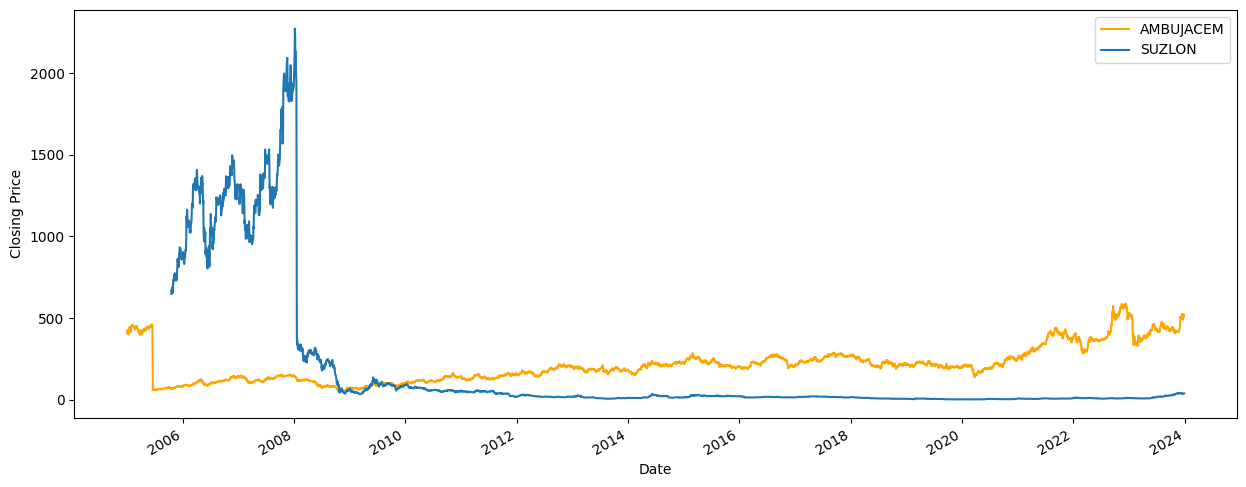

In [252]:
fig, ax = plt.subplots(figsize=(15, 6))
# Plot `df_ambuja` closing price
df_ambuja['close'].plot(ax=ax, label = "AMBUJACEM", color="orange")
df_suzlon["close"].plot(ax=ax, label = "SUZLON")

# Label axes
plt.xlabel("Date")
plt.ylabel("Closing Price")


# Add legend
plt.legend()


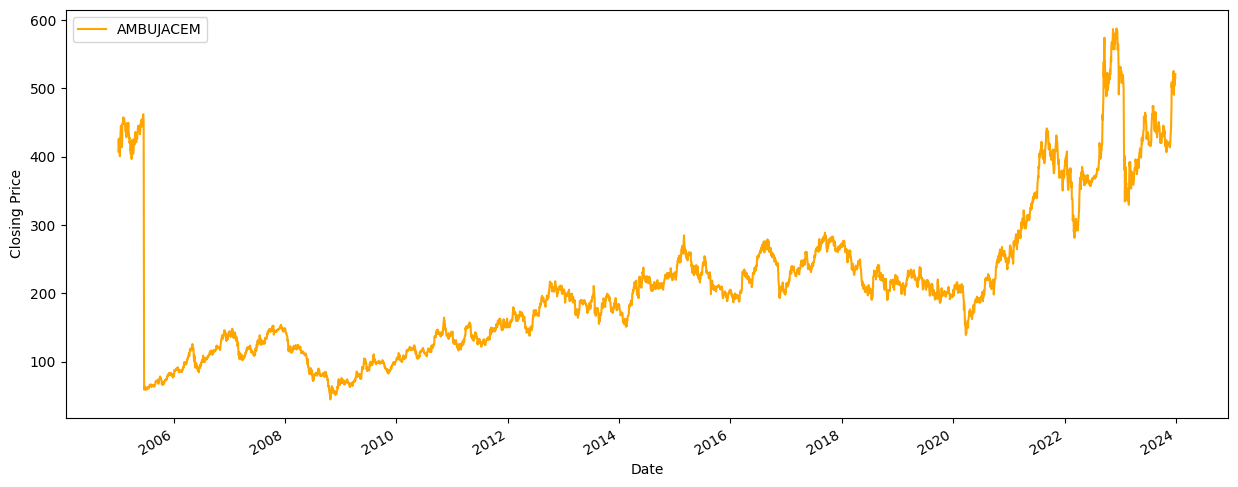

In [258]:
fig, ax = plt.subplots(figsize=(15, 6))
# Plot `df_ambuja` closing price
df_ambuja['close'].plot(ax=ax, label = "AMBUJACEM", color="orange")

# Label axes
plt.xlabel("Date")
plt.ylabel("Closing Price")


# Add legend
plt.legend()


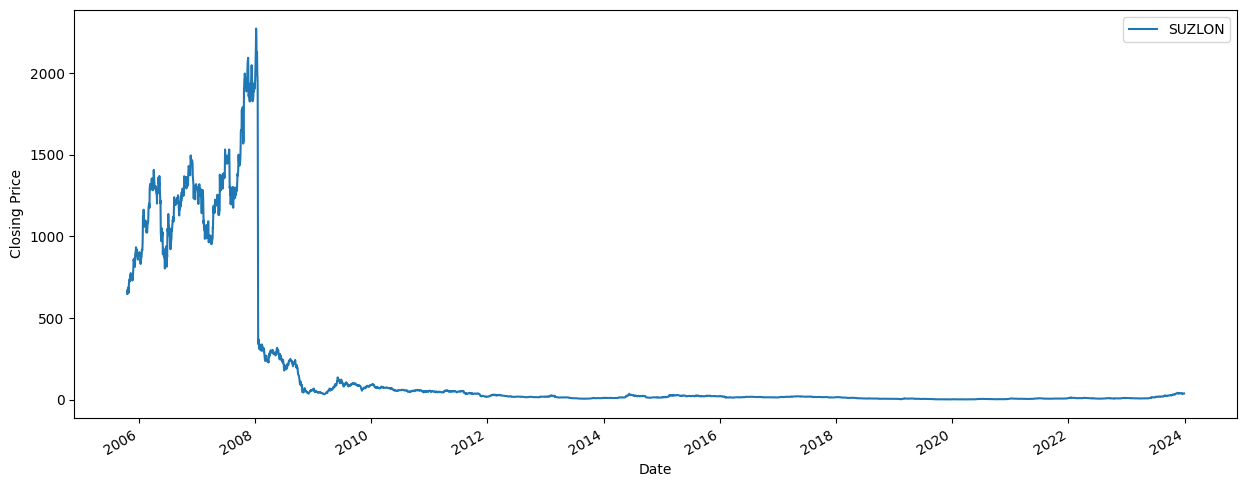

In [259]:
fig, ax = plt.subplots(figsize=(15, 6))
# Plot `df_ambuja` closing price
df_suzlon["close"].plot(ax=ax, label = "SUZLON")

# Label axes
plt.xlabel("Date")
plt.ylabel("Closing Price")


# Add legend
plt.legend()


Looking at this plot, we might conclude that Ambuja Cement is a "better" stock than Suzlon energy because its price is higher. But price is just one factor that an investor must consider when creating an investment strategy. What is definitely true is that it's hard to do a head-to-head comparison of these two stocks because there's such a large price difference.

One way in which investors compare stocks is by looking at their **returns** instead. A return is the change in value in an investment, represented as a percentage. So let's look at the daily returns for our two stocks.

Add a `"return"` column to `df_ambuja` that shows the percentage change in the `"close"` column from one day to the next.

In [260]:
# Sort DataFrame ascending by date
df_ambuja.sort_index(ascending=True, inplace=True)

# Create "return" column
df_ambuja['return'] = round((df_ambuja['close'].pct_change() * 100), 2)

print("df_ambuja shape:", df_ambuja.shape)
print(df_ambuja.info())
df_ambuja.head()

df_ambuja shape: (4679, 6)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4679 entries, 2005-01-03 to 2023-12-29
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    4679 non-null   float64
 1   high    4679 non-null   float64
 2   low     4679 non-null   float64
 3   close   4679 non-null   float64
 4   volume  4679 non-null   float64
 5   return  4678 non-null   float64
dtypes: float64(6)
memory usage: 255.9 KB
None


,open,high,low,close,volume,return
Date,,,,,,
2005-01-03,405.0001,409.5001,403.1001,407.6001,1061050.0,NaN
2005-01-04,410.0001,429.0001,409.0001,425.8501,2501549.0,4.48
2005-01-05,427.0001,439.9001,406.1501,425.9501,3537669.0,0.02
2005-01-06,426.0001,431.0001,412.0001,416.0501,3103853.0,-2.32
2005-01-07,420.0001,428.5001,418.0001,426.3001,2330736.0,2.46


In [261]:
# Sort DataFrame ascending by date
df_suzlon.sort_index(ascending=True, inplace=True)

# Create "return" column
df_suzlon['return'] = round((df_suzlon['close'].pct_change() * 100), 2)


print("df_suzlon shape:", df_suzlon.shape)
print(df_suzlon.info())
df_suzlon.head()

df_suzlon shape: (4482, 6)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4482 entries, 2005-10-20 to 2023-12-29
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    4482 non-null   float64
 1   high    4482 non-null   float64
 2   low     4482 non-null   float64
 3   close   4482 non-null   float64
 4   volume  4482 non-null   float64
 5   return  4481 non-null   float64
dtypes: float64(6)
memory usage: 245.1 KB
None


,open,high,low,close,volume,return
Date,,,,,,
2005-10-20,697.0003,709.8002,637.0002,647.4003,22683542.0,NaN
2005-10-21,644.4502,685.1003,637.0002,673.1503,14260538.0,3.98
2005-10-24,683.0003,689.5502,648.0003,653.3503,7340714.0,-2.94
2005-10-25,654.0003,663.9003,642.2503,659.0003,4034972.0,0.86
2005-10-26,660.0003,693.4503,650.1003,687.9003,8950423.0,4.39


Now let's plot the returns for our two companies and see how the two compare.

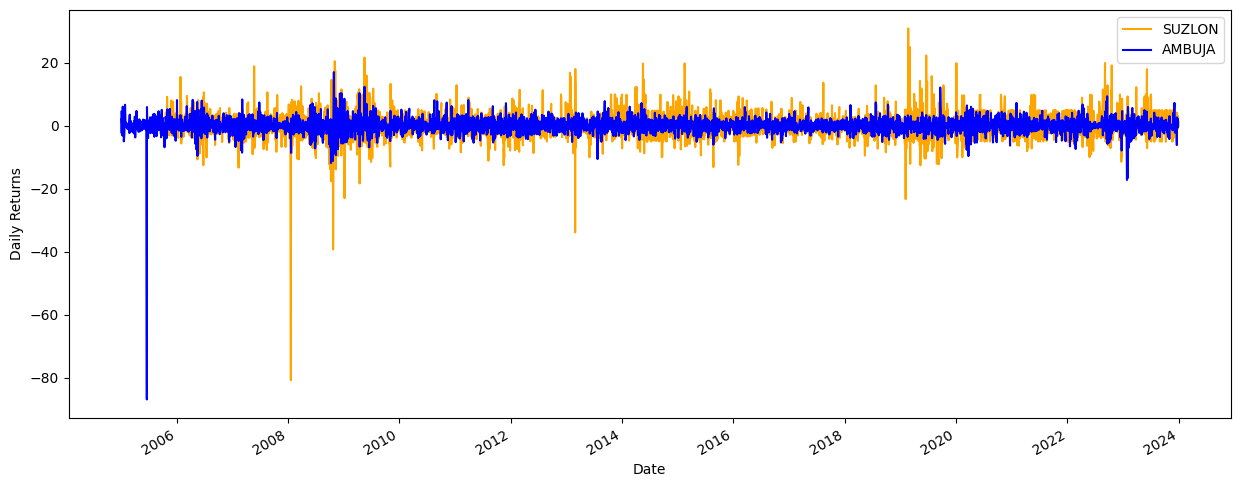

In [263]:
fig, ax = plt.subplots(figsize=(15, 6))
# Plot returns for `df_suzlon` and `df_ambuja`
df_suzlon["return"].plot(ax=ax, label = "SUZLON", color="orange")
df_ambuja["return"].plot(ax=ax, label = "AMBUJA", color="blue")
# Label axes
plt.xlabel("Date")
plt.ylabel("Daily Returns")



# Add legend
plt.legend()
plt.show()

Success! By representing returns as a percentage, we're able to compare two stocks that have very different prices. But what is this visualization telling us? We can see that the returns for Suzlon have a wider spread. We see big gains and big losses. In contrast, the spread for Ambuja is narrower, meaning that the price doesn't fluctuate as much. 

Another name for this day-to-day fluctuation in returns is called [**volatility**](https://en.wikipedia.org/wiki/Volatility_(finance)), which is another important factor for investors. So in the next lesson, we'll learn more about volatility and then build a time series model to predict it.